# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [247]:
# IMPORTS Laure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
pd.options.mode.chained_assignment = None

#IMPORTS Arthur
from os import listdir # to get the file names
from os.path import isfile, join # to get the file names
import pylab # to plot figures

In [248]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [249]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'
print(LEGO_DATA_FOLDER)

data/lego


In [250]:
# array containing the name of files contained in the folder
datafiles = [f for f in listdir(LEGO_DATA_FOLDER) if isfile(join(LEGO_DATA_FOLDER, f))]
datafiles

['inventory_sets.csv.zip',
 '.DS_Store',
 'inventory_parts.csv.zip',
 'part_categories.csv.zip',
 'sets.csv.zip',
 'colors.csv.zip',
 'themes.csv.zip',
 'colors.csv',
 'inventories.csv.zip',
 'parts.csv.zip']

In [251]:
# removing the last characters of the file names ('.csv.zip')
datanames = datafiles.copy()
for i in range(len(datanames)):
    temp = datanames[i]
    datanames[i] = temp[0:-8]
datanames

['inventory_sets',
 '.',
 'inventory_parts',
 'part_categories',
 'sets',
 'colors',
 'themes',
 'co',
 'inventories',
 'parts']

In [252]:
# reading csv files and storing the datasets into a dictionary (using the modified file names as keys)
my_data = {}

for i in range(len(datafiles)):
    my_data[datanames[i]]= pd.read_csv(LEGO_DATA_FOLDER + '/' + datafiles[i])

In [253]:
# displaying the keys of the dictionary
my_data.keys()

dict_keys(['inventory_sets', '.', 'inventory_parts', 'part_categories', 'sets', 'colors', 'themes', 'co', 'inventories', 'parts'])

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

**A2.1 Year Cleaning**

In [254]:
# declaring a DataFrame variable containing the 'sets' dataset
sets = my_data['sets'].copy()

In [255]:
# displaying the first samples of the dataset
sets.head(100)

,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,70s,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
6,0015-1,Space Mini-Figures,1979,143,18
7,0016-1,Castle Mini Figures,19788,186,15
8,00-2,Weetabix Promotional House 1,1976,413,147
9,00-3,Weetabix Promotional House 2,1976,413,149


In [256]:
# describing statistically the numerical features of the dataset
sets.describe()

,theme_id,num_parts
count,11673.000000,11673.000000
mean,311.308575,162.262400
std,177.999101,330.192108
min,1.000000,-1.000000
25%,161.000000,10.000000
50%,324.000000,45.000000
75%,470.000000,172.000000
max,614.000000,5922.000000


In [257]:
# checking the possible values for the feature 'year'
pd.Categorical(sets['year'])

[70s, 1978, 1987, 1979, 1979, ..., -2012, -2015, 2010, -2013, 1996]
Length: 11673
Categories (174, object): [-1962, -1966, -1969, -1971, ..., 2017, 20177, 70s, 80s]

In [258]:
# trying to convert the values of the feature 'year' to numerical values (non-convertible values are set to NaN)
sets['year'] = pd.to_numeric(sets['year'],errors="coerce")

In [259]:
# checking the type of the feature 'year'
sets.year.dtype

dtype('float64')

In [260]:
# looking for the NaN values in the column 'year'
id_na = sets['year'].isna()
original_sets = my_data['sets'].copy()
original_sets[id_na]

,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,70s,414,471
241,102A-1,Front-End Loader,70s,416,64
242,102A-2,Front-End Loader,70s,416,56
252,104-1,Replacement 4.5V Motor,70s,243,1
351,1062-1,{Town Vehicles},80s,533,158
431,1075-1,LEGO People Supplementary Set,80s,511,256
530,1129-1,Storage Cloth (Spread Bag),80s,473,1
533,1130-1,Storage Folder for Building Instructions (16 I...,80s,443,1
724,126-1,Steam Locomotive (Push),70s,235,60
1004,157-3,Four Car Auto Transport,70s,423,65


In [261]:
# checking which values they contain
pd.Categorical(original_sets['year'][id_na])

[70s, 70s, 70s, 70s, 80s, ..., 80s, 80s, 80s, 80s, 80s]
Length: 114
Categories (2, object): [70s, 80s]

In [262]:
# replacing the two possible non-numerical values to numerical, by assuming that it corresponds to a year in between 1970 and 
# 1980 for the value '70s', and between 1980 and 1990 for the value '80s'.
# Then we replaced these values respectively by 1975 and 1985 and added a column to the dataset ('year +/-') which represents the precision
# (kind of error bar) of the 'year' value. For '70s' and '80s', this precision is of +/- 5 years.
# For other values, the precision is of +/- 0 years (perfect precision).
seventies_id = original_sets['year'] == '70s'
eighties_id = original_sets['year'] == '80s'
sets['year'][seventies_id] = 1975.0
sets['year'][eighties_id] = 1985.0
sets['year +/-'] = 0
sets['year +/-'][(seventies_id)|(eighties_id)] = 5

In [263]:
# displaying the first samples of the dataset
sets.head()

,id,name,year,theme_id,num_parts,year +/-
0,00-1,Weetabix Castle,1975.0,414,471,5
1,0011-2,Town Mini-Figures,1978.0,84,12,0
2,0011-3,Castle 2 for 1 Bonus Offer,1987.0,199,2,0
3,0012-1,Space Mini-Figures,1979.0,143,12,0
4,0013-1,Space Mini-Figures,1979.0,143,12,0


In [264]:
# looking for the negative values for the feature 'year', and replacing them with the opposite value
id_neg = sets['year']<0;
sets['year'][id_neg] = -sets['year'][id_neg]

In [265]:
# displaying the first samples
sets.head()

,id,name,year,theme_id,num_parts,year +/-
0,00-1,Weetabix Castle,1975.0,414,471,5
1,0011-2,Town Mini-Figures,1978.0,84,12,0
2,0011-3,Castle 2 for 1 Bonus Offer,1987.0,199,2,0
3,0012-1,Space Mini-Figures,1979.0,143,12,0
4,0013-1,Space Mini-Figures,1979.0,143,12,0


In [266]:
# sorting the samples by year, to check that we have no more negative values
sets.sort_values(ascending=True, by=['year']).head()

,id,name,year,theme_id,num_parts,year +/-
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950.0,371,7,0
6954,700.A-1,Automatic Binding Bricks Small Brick Set (Lego...,1950.0,366,24,0
6958,700.B.3-1,Individual 1 x 2 x 2 Window (without glass),1950.0,371,7,0
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950.0,371,7,0
6935,700.1.1-1,Individual 2 x 4 Bricks,1950.0,371,10,0


In [267]:
# describing statistically the numerical features of the dataset ('year' is now a numerical feature and NaN are ignored)
sets.describe()

,year,theme_id,num_parts,year +/-
count,11673.000000,11673.000000,11673.000000,11673.000000
mean,4777.418658,311.308575,162.262400,0.048831
std,6520.165759,177.999101,330.192108,0.491721
min,1950.000000,1.000000,-1.000000,0.000000
25%,1997.000000,161.000000,10.000000,0.000000
50%,2007.000000,324.000000,45.000000,0.000000
75%,2015.000000,470.000000,172.000000,0.000000
max,20177.000000,614.000000,5922.000000,5.000000


In [268]:
# changing the type from float to integer
sets['year'] = sets['year'].astype(int)

# checking again the type of the feature 'year'
sets['year'].dtype

# changing the type from integer to string (this double type change allows to avoid '.0' at the end of the strings)
sets['year'] = sets['year'].astype(str)

In [269]:
# computing the number of characters for each year value (a year value should contain 4 characters, e.g. '1978')
nb_char = []
for word in sets['year']:
    nb_char.append(len(word))
    
# checking the maximal number of characters
max(nb_char)

# transforming the variable from list to numpy array
nb_char = np.array(nb_char)

# looking for the samples where we have 5 characters instead of 4.
indices_max = np.where(nb_char == 5)[0]
indices_max

# displaying the number of such samples
len(indices_max)

# displaying some of these erroneous samples
sets['year'][indices_max].head()

7     19788
30    20011
50    20022
56    20033
59    20022
Name: year, dtype: object

In [270]:
# couting the number of samples which have 5 characters and whose two last characters are different

counter = 0

for i in indices_max:
    if(sets['year'][i][-2] != sets['year'][i][-1]):
        counter = counter + 1

counter

# as the samples with 5 characters have always the same two last characters, we can assume that this is a typo and that we can
# remove the last character for all of them
for i in indices_max:
    sets['year'][i] = sets['year'][i][0:-1]
    
# displaying some of these corrected samples
sets['year'][indices_max].head()

7     1978
30    2001
50    2002
56    2003
59    2002
Name: year, dtype: object

In [271]:
# nevertheless, some corrections that we made can be ambiguous and non-unique (e.g. we corrected '19966' into '1996' but it
# can also be corrected into '1966'). We have no way to know which typo has been made, so we choose to put NaN values for these
# cases. The cases are : 1993, 1994, 1995, 1996, 1997, 1998 and 2001.

problematic_year = np.array(range(1993,1999))
problematic_year = np.append(problematic_year,2001)

problematic_indices = []
sets['year'] = pd.to_numeric(sets['year'],errors="coerce")

ambiguous_cases = 0
for i in indices_max:
    if(int(sets['year'][i]) in list(problematic_year)):
        ambiguous_cases = ambiguous_cases + 1
        problematic_year = np.append(problematic_year,i)
        sets['year'][i] = np.nan
        
# displaying the number of NaN values
ambiguous_cases

# displaying some of the corrected samples, including NaN
sets['year'][indices_max].head()

7     1978.0
30       NaN
50    2002.0
56    2003.0
59    2002.0
Name: year, dtype: float64

In [272]:
# describing statistically the dataset (after data cleaning)
sets.describe()

,year,theme_id,num_parts,year +/-
count,11514.000000,11673.000000,11673.000000,11673.000000
mean,2002.073476,311.308575,162.262400,0.048831
std,13.477577,177.999101,330.192108,0.491721
min,1950.000000,1.000000,-1.000000,0.000000
25%,1997.000000,161.000000,10.000000,0.000000
50%,2006.000000,324.000000,45.000000,0.000000
75%,2012.000000,470.000000,172.000000,0.000000
max,2017.000000,614.000000,5922.000000,5.000000


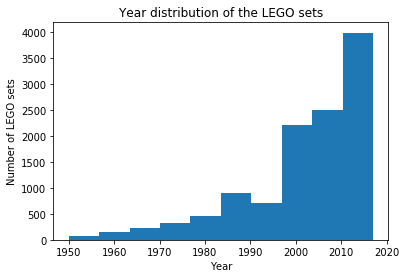

In [273]:
# plotting a histogram of the 'year' feature (after data cleaning)
pylab.figure()
pylab.hist(sets['year'][~np.isnan(sets['year'])])
pylab.ylabel('Number of LEGO sets')
pylab.xlabel('Year')
pylab.title('Year distribution of the LEGO sets')
pylab.show()

**A2.1 Year Cleaning: Our Approach**

First, we noticed that the 'year' feature contains non-numerical data (using the command describe()).
We checked the possible categorical values taken by this column and figured out that it contains sometimes strings like '70s', and that it contains also impossible negative values.
We converted the 'year' values to numerical when possible, putting NaN to non-convertible ones.

Then we looked for the NaN values and checked what the samples originally contained. Two possible values : '70s' and '80s'.
We assumed that it corresponds to a year in between 1970 and 1980 for the value '70s', and between 1980 and 1990 for the value '80s'.
Therefore we replaced these values with respectively 1975 and 1985, and added a column to the dataset ('year +/-') which represents the precision (kind of error bar) of the 'year' value. For '70s' and '80s', this precision is of +/- 5 years. For other values, the precision is of +/- 0 years (perfect precision).

After this, we replaced all the negative entries with the opposite values (e.g. -1971 -> 1971).

Then we statistically described the data and we observed that the averaged value for the 'year' is around 4000, which is not reasonable. We must have huge values in our dataset which bias the results.
Therefore, we checked the number of characters in each year (after converting them to strings).
We realized that indeed some samples contained 5-character years, which is not possible (maximal year is the current one, i.e. 2018).
After checking that the samples with 5 characters have always the same two last characters, we assumed that this is a typical typo and that we can remove the last character for all of them.
Nevertheless, some corrections that we made can be ambiguous and non-unique (e.g. we corrected '19966' into '1996' but it can also be corrected into '1966'). We have no way to know which typo has been made, so we choose to put NaN values for these cases. The ambiguous cases are : 1993, 1994, 1995, 1996, 1997, 1998 and 2001.

Finally, we described statistically the cleaned dataset and we plotted the histogram of the 'year' feature.
The time range of the LEGO sets is from year 1950 to year 2017.

**A.2.2 Quantity Cleaning** 

In [274]:
# Quantity Cleaning by treating the 3 abnormal cases for the quantities. 
quantities=my_data['inventory_parts']['quantity']
quantities = quantities.replace([-np.inf,np.inf, quantities<0], np.nan)

#Compute the mean of the quantities that ignores the previously set NaN values
average_quantity=np.ceil(np.nanmean(quantities))
print("Average quantitiy of the inventory parts is ",average_quantity, \
      " : per part there are roughly 4 elements accounted for in the data.")

#for subsequent usage, save this modified version of the data as working data
my_data['inventory_parts']['quantity'] =quantities

Average quantitiy of the inventory parts is  4.0  : per part there are roughly 4 elements accounted for in the data.


**A2.2 Quantity Cleaning: Our Approach**

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

**A.3.1 SETS THAT CONTAIN CARS**

In [275]:
inventory_sets = my_data['inventory_sets'].copy()
# sets have been declared before (+ cleaning)
inventory_sets.head()

,inventory_id,set_id,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [276]:
sets.head()

,id,name,year,theme_id,num_parts,year +/-
0,00-1,Weetabix Castle,1975.0,414,471,5
1,0011-2,Town Mini-Figures,1978.0,84,12,0
2,0011-3,Castle 2 for 1 Bonus Offer,1987.0,199,2,0
3,0012-1,Space Mini-Figures,1979.0,143,12,0
4,0013-1,Space Mini-Figures,1979.0,143,12,0


In [277]:
# we only keep the samples whose name ends by 'car' or 'cars'

car_sets = sets.copy()
car_sets = car_sets[car_sets['name'].apply(lambda x: (x.endswith('car')) | (x.endswith('Car')) | (x.endswith('Cars')) | (x.endswith('cars')) )]

print(len(car_sets))
car_sets.head(100)                      

144


,id,name,year,theme_id,num_parts,year +/-
27,10002-1,Railroad Club Car,2001.0,233,272,0
142,10158-1,High Speed Train Car,2004.0,239,151,0
154,10170-1,TTX Intermodal Double-Stack Car,2005.0,236,365,0
250,1038-1,ERBIE the Robo-Car,1985.0,1,120,0
295,10552-1,Creative Cars,2013.0,504,42,0
325,10589-1,Rally Car,2015.0,504,13,0
446,1076-22,Advent Calendar 1999 (Day 21) Police Car,1999.0,217,11,0
505,1109-1,Magnetic Couplings for Railway Car,1977.0,456,4,0
600,11908-1,Build Your Own Adventure with Liza Mini-Doll a...,2015.0,494,77,0
705,1247-1,Patrol Car,1999.0,50,32,0


In [278]:
# we merge the 'sets' dataset of cars with the inventory_sets original dataset,
# in order to get the associated inventory IDs.

car_inventory_sets = inventory_sets.copy()

merged_car_sets = pd.merge(car_inventory_sets, car_sets, left_on = 'set_id', right_on = 'id')

print(len(merged_car_sets))
merged_car_sets.sort_values(ascending=True, by=['inventory_id']).head(100)

51


,inventory_id,set_id,quantity,id,name,year,theme_id,num_parts,year +/-
0,528,6633-1,1,6633-1,Family Car,1985.0,85,46,0
2,908,7030-1,1,7030-1,Squad Car,2003.0,111,51,0
3,1371,6611-1,1,6611-1,Fire Chief's Car,1981.0,74,20,0
5,1371,6623-1,1,6623-1,Police Car,1983.0,80,40,0
6,1401,7241-1,1,7241-1,Fire Car,2005.0,58,47,0
7,1418,7241-1,1,7241-1,Fire Car,2005.0,58,47,0
18,1649,4436-1,1,4436-1,Patrol Car,2012.0,61,96,0
21,1716,1517-1,1,1517-1,Race Car,1989.0,82,32,0
8,1732,7241-1,1,7241-1,Fire Car,2005.0,58,47,0
22,2917,4524-6,1,4524-6,Advent Calendar 2002 Creator (Day 5) Car,2002.0,223,15,0


 **A.3.1. SETS THAT CONTAIN CARS : Our approach**

We only kept the samples where the set name ends with 'car' or 'cars'. We chose to specify that the name has to end with this word (and not just contain it), because it allows to remove samples like 'scary laboratory', 'scarox', 'heartlake puppy daycare' but still keeping 'supercar', 'handcar' or 'sidecar'.

Then we merged the cars sets dataset with the original inventory_set one, in order to get the associated inventory IDs.

**A.3.2 20 MOST ABUNDANT PART CATEGORIES** 

In [279]:
#Plot distribution of 20 largest part categories (based on their size)

# 1. First Merge to make the link between the Part Quantities and ID Categories
Quantity_Parts=my_data['inventory_parts'][['part_id','quantity']]
Quantity_Parts=Quantity_Parts.rename(columns={'part_id': 'id'})

Parts_IDCat=my_data['parts'][['id','part_cat_id']]
Quantity_IDCat=pd.merge(Parts_IDCat,Quantity_Parts, on='id')

In [280]:
# 2. Second Merge to make link between the Part Quantities and the Category Names

Cat_Name=my_data['part_categories']
Cat_Name=Cat_Name.rename(columns={'id': 'part_cat_id'})

Quantity_CatName=pd.merge(Quantity_IDCat,Cat_Name, on='part_cat_id')

In [281]:
#3. Reorder, aggregate data to obtain the 20 most abundant categories
#We have chosen previously that the abnormal range quantities should been turned to NaN
#We choose to not base ourselves on them for the choice of the abundant part categories
Quantity_CatName=Quantity_CatName.dropna()
print("Total Number of parts: ",Quantity_CatName['quantity'].sum())
#We aggregate by part category ID
AllCategories=Quantity_CatName.groupby(['part_cat_id']).agg(({'quantity':'sum','name':'min'})).reset_index()

#Most Abundant Categories
TopCategories=AllCategories.sort_values(by='quantity', ascending=False).reset_index()[1:20]

#Classification by Ascending Part Category ID
AllCategories.head()

Total Number of parts:  1605267.0


,part_cat_id,quantity,name
0,1,1198.0,Baseplates
1,2,3084.0,Bricks Printed
2,3,100268.0,Bricks Sloped
3,4,9173.0,"Duplo, Quatro and Primo"
4,5,40527.0,Bricks Special


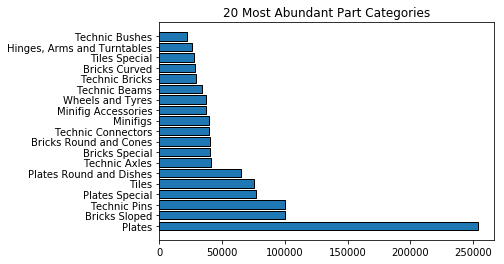

In [282]:
#Graphic representation
barchart=plt.barh(TopCategories['name'], TopCategories['quantity'], \
                 edgecolor='black')

plt.title('20 Most Abundant Part Categories')
plt.show()

**A.3.2 20 MOST ABUNDANT PART CATEGORIES: Our Approach** 

**A.3.3 DOMINANT COLOR PER SET & DOMINANT COLORS OVER ALL SETS AND PARTS** 

In [283]:
#Find Dominant Color of Each set

#Step 1 First Data Frame Merge

#organize the first set of Data: Inventory of Sets
SetInventory=my_data['inventory_sets']
SetInventory=SetInventory.sort_values(by=['inventory_id']).rename(columns={'quantity': 'set_quantity'})

#organize the second set of Data: Inventory of Parts
PartsInventory=my_data['inventory_parts'][['inventory_id','part_id','color_id','quantity']]
PartsInventory=PartsInventory.sort_values(by=['inventory_id']).rename(columns={'quantity': 'part_quantity'})

#Uncommenting the following prints will reveal that there are more inventory IDs 
#in the parts inventory than in the set inventory. 
#In real life matters, this translates to the fact that we have parts that are inventorized
#but these parts do not belong to any of the sets inventorized 
#print(SetInventory['inventory_id'].unique())
#print(PartsInventory['inventory_id'].unique())

#Through merge: -through the inventory ID link- get which parts are in which sets
PartsInASet=pd.merge(PartsInventory,SetInventory)


In [284]:
#Step 2 Second Data Frame Merge
#reorganize data for second merge
PartsInASet=PartsInASet[['color_id','set_id','set_quantity','part_id','part_quantity']].sort_values(by=['color_id'])

ColorList=my_data['colors']
ColorList=ColorList.rename(columns={'id': 'color_id'}).sort_values(by=['color_id'])

#merge to link the parts' color ID to the actual color reference in the Color List DataFrame
ColorsInASet=pd.merge(ColorList,PartsInASet,on='color_id')

In [285]:
#Reorder the column for a clear dataset
ColorsInASet=ColorsInASet[['set_id','set_quantity','part_quantity','name','rgb']]
#We have chosen previously that the abnormal range quantities should been turned to NaN
#We choose to not base ourselves on them for the choice of representative color
ColorsInASet=ColorsInASet.dropna()

#We aggregate by color and by set now
ColorInASet=ColorsInASet.groupby(['set_id']).agg(({'part_quantity':'sum', 'rgb': 'max', 'name': 'max','set_quantity': 'sum'}))

#We now have a dominant color for each single set
ColorInASet.head()

,part_quantity,rgb,name,set_quantity
set_id,,,,
10127-1,2.0,05131D,[No Color],4
10173-1,23.0,6C6E68,Dark Bluish Gray,3
10194-1,1.0,05131D,[No Color],1
10233-1,1.0,05131D,[No Color],1
1062-1,124.0,FFFFFF,White,16


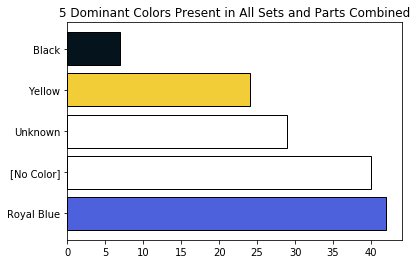

In [286]:
#We aggregate by color name and by set quantity to get the overall dominant colors

#We consider that for each number of sets there are its corresponding pieces
ColorInASet['total_pondering']=ColorInASet['part_quantity']*ColorInASet['set_quantity']
AllColors=ColorInASet.groupby('name').agg(({'total_pondering':'count','rgb':'min'}))
AllColors=AllColors.sort_values(by=['total_pondering'], ascending=False)
DominantColors=AllColors[0:5]

#Here an extension would be to clean the RGB data to check if No Color or Unknown could correspond to a color 
#Since this is not asked, we have chosen to represent their neutrality by making them "white"
DominantColors['rgb'][1:3]='ffffff'
rgb_colors=DominantColors['rgb']
barchart=plt.barh(DominantColors.index, DominantColors['total_pondering'], \
                 color=rgb_colors.apply(lambda x: '#{}'.format(x)),edgecolor='black')

plt.title('5 Dominant Colors Present in All Sets and Parts Combined')
plt.show()

**A.3.3 DOMINANT COLOR PER SET & DOMINANT COLORS OVER ALL SETS AND PARTS: Our Approach** 

**A.3.4 SCATTER PLOT LUMINANCE OF SETS VS. PUBLISHING YEAR** 

In [287]:
# Scatter Plot of Luminance of the Sets vs. Publishing Year

#We take the data we have obtained previously
#We take the DataFrame corresponding to the dominant color for each set_id 
ColorSet=ColorInASet.drop(columns=['part_quantity', 'set_quantity'])
SetYear=sets[['id','year']]
#Merge to obtain the link between dominant color and year of the respective sets
ColorToYear=pd.merge(ColorSet,SetYear, left_index=True, right_on='id').reset_index()
ColorToYear=ColorToYear[['id','year', 'name', 'rgb' ]]
ColorToYear.head()

,id,year,name,rgb
0,10127-1,2003.0,[No Color],05131D
1,10173-1,2006.0,Dark Bluish Gray,6C6E68
2,10194-1,2009.0,[No Color],05131D
3,10233-1,2013.0,[No Color],05131D
4,1062-1,1985.0,White,FFFFFF


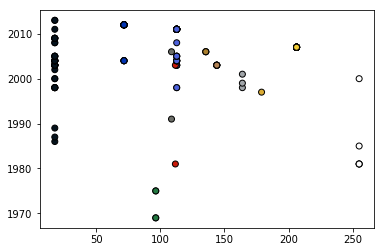

In [288]:
#Compute the Luminance

def hex_to_rgb(hexcode):
    hexcode=tuple([int(hexcode[k:k+2], 16) for k in (0,2,4)])
    return hexcode

def compute_luminance(rgb):
    R2=np.power(rgb[0],2)
    G2=np.power(rgb[1],2)
    B2=np.power(rgb[2],2)
    luminance=np.sqrt(0.299*R2+0.587*G2+0.114*B2)
    return luminance

#Convert the hex codes to the RGB triplets
ColorToYearCopy=ColorToYear.copy()
ColorToYearCopy['rgb']=ColorToYearCopy['rgb'].apply(lambda x: hex_to_rgb(x))

#Add a column corresponding to the Luminance in the DataFrame
luminance=ColorToYearCopy['rgb'].apply(lambda x: compute_luminance(x))
ColorToYearCopy['luminance'] = pd.Series(luminance, index=ColorToYearCopy.index)
ColorToYearCopy=ColorToYearCopy.sort_values(by=['year'],ascending=True)
ColorToYearCopy.head(20)

# Order to have the rgb codes in the same order to color each point of the scatter plot
ColorToYear=ColorToYear.sort_values(by=['year'],ascending=True)

#Make Scatterplot of Years vs. Luminance
# Plot the scatter plot with each point the color it is affected to
scatterplot=plt.scatter(ColorToYearCopy['luminance'],ColorToYearCopy['year'], \
                        color=ColorToYear['rgb'].apply(lambda x: '#{}'.format(x)), edgecolor='black')

plt.show()

**A.3.4 SCATTER PLOT LUMINANCE OF SETS VS. PUBLISHING YEAR: Our Approach** 

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [289]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [290]:
#Loading
Original_MetroBike=pd.read_json(BIKES_DATA_FOLDER +'/metro-bike-share-trip-data.json.zip')
print(Original_MetroBike.head())


   Bike ID  Duration             End Time  Ending Station ID  \
0   6281.0       180  2016-07-07T04:20:00             3014.0   
1   6281.0      1980  2016-07-07T06:33:00             3014.0   
2   5861.0       300  2016-07-07T10:37:00             3016.0   
3   5861.0     10860  2016-07-07T13:38:00             3016.0   
4   6674.0       420  2016-07-07T12:58:00             3032.0   

   Ending Station Latitude  Ending Station Longitude Passholder Type  \
0                34.056610                -118.23721    Monthly Pass   
1                34.056610                -118.23721    Monthly Pass   
2                34.052898                -118.24156       Flex Pass   
3                34.052898                -118.24156       Flex Pass   
4                34.049889                -118.25588         Walk-up   

   Plan Duration           Start Time  Starting Station ID  \
0           30.0  2016-07-07T04:17:00               3014.0   
1           30.0  2016-07-07T06:00:00               3014.0

In [291]:
print(Original_MetroBike['Trip Route Category'].unique())
print(Original_MetroBike['Bike ID'].shape[0])
print(Original_MetroBike['Bike ID'].unique().shape[0])

['Round Trip' 'One Way']
132427
764


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

__\* Briefly explain your approach here \*__

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [292]:
# Write your code here

__\* Briefly explain your approach for every query here \*__